In [ ]:
!pip install ctgan
!pip install sdv

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 104.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 84.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 58.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 73.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 70.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
 

In [ ]:
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
dry_bean = fetch_ucirepo(id=602)

# data (as pandas dataframes)
X = dry_bean.data.features
y = dry_bean.data.targets

# metadata
print(dry_bean.metadata)
metadata = dry_bean.metadata

# variable information
print(dry_bean.variables)

{'uci_id': 602, 'name': 'Dry Bean', 'repository_url': 'https://archive.ics.uci.edu/dataset/602/dry+bean+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/602/data.csv', 'abstract': 'Images of 13,611 grains of 7 different registered dry beans were taken with a high-resolution camera. A total of 16 features; 12 dimensions and 4 shape forms, were obtained from the grains.', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 13611, 'num_features': 16, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['Class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2020, 'last_updated': 'Thu Mar 28 2024', 'dataset_doi': '10.24432/C50S4B', 'creators': [], 'intro_paper': {'ID': 244, 'type': 'NATIVE', 'title': 'Multiclass classification of dry beans using computer vision and machine learning techniques', 'authors': 'M. Koklu, Ilker Ali Özkan', 'venue': 'Co

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


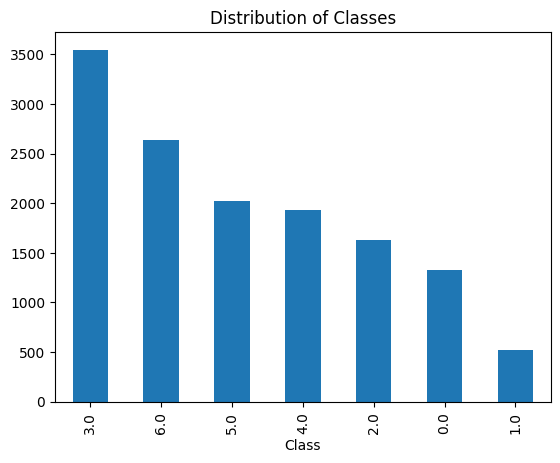

In [ ]:
from sdv.single_table import CTGANSynthesizer
from sklearn.preprocessing import StandardScaler as sc
from sklearn.preprocessing import LabelEncoder as lc
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd # Import pandas

# ... (your existing code) ...

# Convert X to a Pandas DataFrame before detecting schema
X = pd.DataFrame(X)  # Convert NumPy array 'X' to a Pandas DataFrame

# Scale and encode data if necessary
Scaler = sc()
X_scaled = Scaler.fit_transform(X)  # Store scaled data in a new variable
y_encoded = lc().fit_transform(y)
y_encoded = y_encoded.reshape(-1, 1)

# Create a DataFrame from the scaled and encoded data
Df = pd.DataFrame(np.concatenate([X_scaled, y_encoded], axis=1), columns=list(X.columns) + ['Class']) # Assuming 'target' is the name of your target column

from collections import Counter
counter = Counter(Df['Class'])
counter

# distribution of the two classes
Df['Class'].value_counts().plot(kind='bar', title='Distribution of Classes')
plt.show()

# Knn, SVM, Decission **Tree**

Accuracy: 0.93
Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.92      0.93       400
         1.0       1.00      1.00      1.00       165
         2.0       0.94      0.95      0.94       491
         3.0       0.90      0.93      0.92      1053
         4.0       0.95      0.96      0.96       559
         5.0       0.95      0.95      0.95       604
         6.0       0.88      0.85      0.87       812

    accuracy                           0.93      4084
   macro avg       0.94      0.94      0.94      4084
weighted avg       0.92      0.93      0.92      4084

[[0.92       0.         0.0575     0.         0.0025     0.01
  0.01      ]
 [0.         1.         0.         0.         0.         0.
  0.        ]
 [0.02851324 0.         0.95315682 0.         0.01221996 0.
  0.00610998]
 [0.         0.         0.         0.9325736  0.002849   0.01329535
  0.05128205]
 [0.         0.         0.00894454 0.00536673 0.95706619 0.

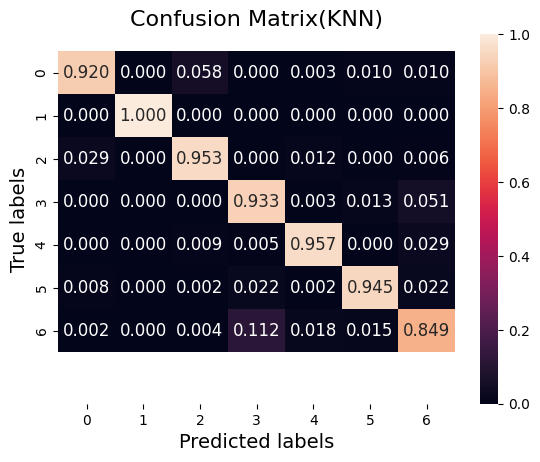

In [ ]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import metrics
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load the Dataset
data = Df # Replace with your dataset file path


# Select the target class ("management" column) and features (PCA components)
X = Df.iloc[:, :-1]  # Features
y = Df['Class']  # Assuming "management" is the name of the column

# Split the dataset into training and testing sets
for i in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)

# Step 4: Standardize the Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 5: Train the KNN Model
knn = KNeighborsClassifier(n_neighbors=5)  # You can change n_neighbors (k)
knn.fit(X_train, y_train)

# Step 6: Make Predictions and Evaluate the Model
y_pred = knn.predict(X_test)

# Step 7: Evaluate the Model's Performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
#print(cm)
cm=np.transpose( np.transpose(cm) / cm.astype(np.float64).sum(axis=1) )
print(cm)

cm = pd.DataFrame(cm,
                     index = ['0','1','2','3','4','5','6'],
                     columns =['0','1','2','3','4','5','6'] )

print(cm)

ax=sns.heatmap(cm, annot=True, fmt="0.3f", annot_kws={"size": 12})
bottom, top = ax.get_ylim()
ax.set_ylim(bottom+1.2, top-0.4)
plt.xlabel("Predicted labels", fontsize=14)
plt.ylabel("True labels", fontsize=14)
plt.title("Confusion Matrix(KNN)", fontsize=16)
plt.show()

Accuracy: 0.89
Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      0.90      0.88       400
         1.0       1.00      1.00      1.00       165
         2.0       0.91      0.90      0.91       491
         3.0       0.87      0.91      0.89      1053
         4.0       0.91      0.92      0.92       559
         5.0       0.93      0.93      0.93       604
         6.0       0.84      0.80      0.82       812

    accuracy                           0.89      4084
   macro avg       0.91      0.91      0.91      4084
weighted avg       0.89      0.89      0.89      4084

[[0.9        0.         0.0675     0.         0.0175     0.005
  0.01      ]
 [0.         1.         0.         0.         0.         0.
  0.        ]
 [0.0610998  0.         0.89816701 0.         0.03258656 0.
  0.00814664]
 [0.         0.         0.         0.90598291 0.00664767 0.01614435
  0.07122507]
 [0.01252236 0.         0.01610018 0.01610018 0.91592129 0

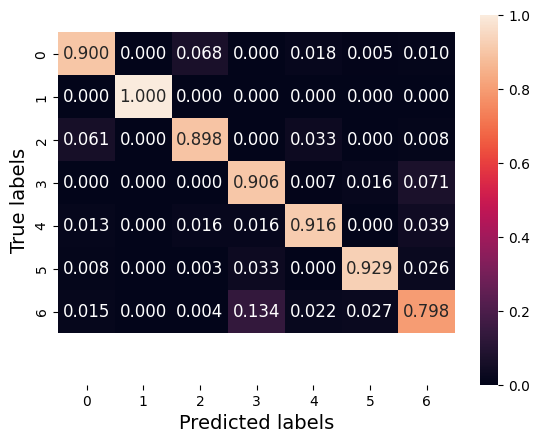

Accuracy: 0.89
Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      0.90      0.88       400
         1.0       1.00      1.00      1.00       165
         2.0       0.91      0.90      0.91       491
         3.0       0.87      0.91      0.89      1053
         4.0       0.91      0.92      0.92       559
         5.0       0.93      0.93      0.93       604
         6.0       0.84      0.80      0.82       812

    accuracy                           0.89      4084
   macro avg       0.91      0.91      0.91      4084
weighted avg       0.89      0.89      0.89      4084

[[0.9        0.         0.0675     0.         0.0175     0.005
  0.01      ]
 [0.         1.         0.         0.         0.         0.
  0.        ]
 [0.0610998  0.         0.89816701 0.         0.03258656 0.
  0.00814664]
 [0.         0.         0.         0.90598291 0.00664767 0.01614435
  0.07122507]
 [0.01252236 0.         0.01610018 0.01610018 0.91592129 0

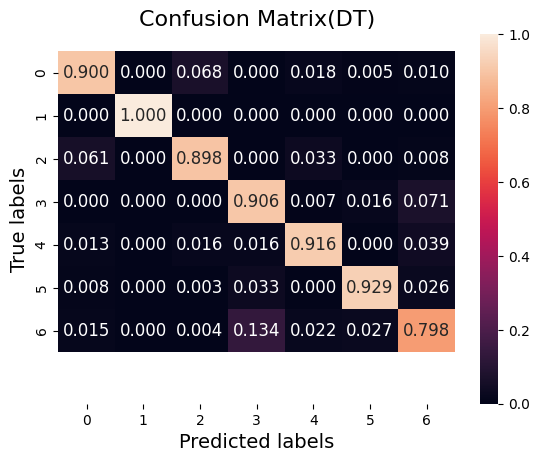

In [ ]:
from sklearn.tree import DecisionTreeClassifier as dtree
for i in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)

# Create and train the Decision Tree classifier
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dtree.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the accuracy and classification report
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(report)

cm = confusion_matrix(y_test, y_pred)
#print(cm)
cm=np.transpose( np.transpose(cm) / cm.astype(np.float64).sum(axis=1) )
print(cm)

cm = pd.DataFrame(cm,
                     index = ['0','1','2','3','4','5','6'],
                     columns =['0','1','2','3','4','5','6'] )

print(cm)

ax=sns.heatmap(cm, annot=True, fmt=".3f", annot_kws={"size": 12})
bottom, top = ax.get_ylim()
ax.set_ylim(bottom+1.2, top-0.4)
plt.xlabel("Predicted labels", fontsize=14)
plt.ylabel("True labels", fontsize=14)
plt.show()


# Create and train the Decision Tree classifier
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dtree.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the accuracy and classification report
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(report)

cm = confusion_matrix(y_test, y_pred)
#print(cm)
cm=np.transpose( np.transpose(cm) / cm.astype(np.float64).sum(axis=1) )
print(cm)

cm = pd.DataFrame(cm,
                     index = ['0','1','2','3','4','5','6'],
                     columns =['0','1','2','3','4','5','6'] )

print(cm)

ax=sns.heatmap(cm, annot=True, fmt="0.3f", annot_kws={"size": 12})
bottom, top = ax.get_ylim()
ax.set_ylim(bottom+1.2, top-0.4)

plt.xlabel("Predicted labels", fontsize=14)
plt.ylabel("True labels", fontsize=14)
plt.title("Confusion Matrix(DT)", fontsize=16)
plt.show()

Accuracy: 0.930460333006856
[[0.92       0.         0.055      0.         0.0075     0.01
  0.0075    ]
 [0.         1.         0.         0.         0.         0.
  0.        ]
 [0.02443992 0.         0.9592668  0.         0.01221996 0.
  0.00407332]
 [0.         0.         0.         0.93067426 0.         0.01804368
  0.05128205]
 [0.         0.         0.00894454 0.01252236 0.95527728 0.
  0.02325581]
 [0.00662252 0.         0.         0.01490066 0.00165563 0.95529801
  0.02152318]
 [0.00123153 0.         0.         0.10098522 0.01847291 0.01108374
  0.8682266 ]]
          0    1         2         3         4         5         6
0  0.920000  0.0  0.055000  0.000000  0.007500  0.010000  0.007500
1  0.000000  1.0  0.000000  0.000000  0.000000  0.000000  0.000000
2  0.024440  0.0  0.959267  0.000000  0.012220  0.000000  0.004073
3  0.000000  0.0  0.000000  0.930674  0.000000  0.018044  0.051282
4  0.000000  0.0  0.008945  0.012522  0.955277  0.000000  0.023256
5  0.006623  0.0  0.00000

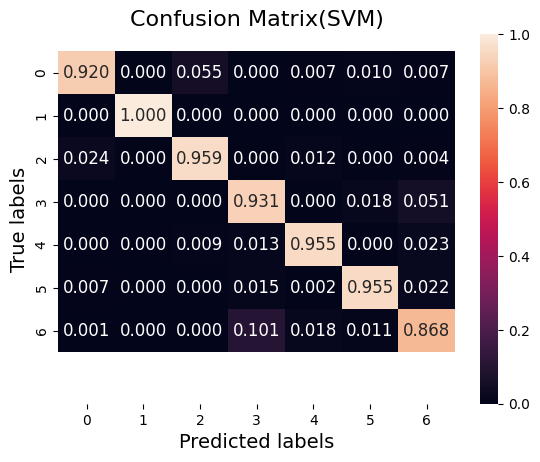

In [ ]:
from sklearn import svm

# Split the dataset into training and testing sets
for i in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)

    clf = svm.SVC(kernel='rbf') # rbf Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

cm = confusion_matrix(y_test, y_pred)
#print(cm)
cm=np.transpose( np.transpose(cm) / cm.astype(np.float64).sum(axis=1) )
print(cm)

cm = pd.DataFrame(cm,
                     index = ['0','1','2','3','4','5','6'],
                     columns =['0','1','2','3','4','5','6'] )

print(cm)

ax=sns.heatmap(cm, annot=True, fmt="0.3f", annot_kws={"size": 12})
bottom, top = ax.get_ylim()
ax.set_ylim(bottom+1.2, top-0.4)
plt.title("Confusion Matrix(SVM)", fontsize=16)
plt.xlabel("Predicted labels", fontsize=14)
plt.ylabel("True labels", fontsize=14)
plt.show()

In [ ]:
#Get metadata from the DataFrame *before* initializing the synthesizer
from sdv.metadata import SingleTableMetadata
metadata = SingleTableMetadata()
metadata.detect_from_dataframe(Df)

# Initialize the synthesizer *with* the metadata
synthesizer = CTGANSynthesizer(metadata) # Initialize with metadata

# Now you can fit the synthesizer to your data
synthesizer.fit(Df) # Fit using the DataFrame 'Df'
synthetic_data = synthesizer.sample(num_rows=15000)

/usr/local/lib/python3.11/dist-packages/sdv/single_table/base.py:119: FutureWarning: The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.
  warnings.warn(DEPRECATION_MSG, FutureWarning)
/usr/local/lib/python3.11/dist-packages/sdv/single_table/base.py:104: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(


In [ ]:
synthetic_data

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRatio,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,Roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,-0.162584,-0.152152,-0.380032,-0.408460,-0.761067,0.091829,-0.372004,-0.228423,0.286533,0.802361,0.673850,0.142934,0.384288,-0.176484,0.009496,0.704161,6.0
1,0.721419,0.741044,0.667905,0.675595,0.526656,0.230574,0.530699,0.614769,-0.821845,-1.388204,-0.565760,-0.731936,-0.938256,-1.231456,-0.787856,0.210280,0.0
2,0.705415,0.623298,0.823164,0.710443,0.300714,0.315224,0.553088,0.797942,1.625267,-2.154517,0.160151,-0.355455,-1.045470,-1.219708,-0.365226,-0.164903,2.0
3,-0.170915,-0.160393,-1.096049,-0.249913,-1.552896,-2.584044,-0.630417,-0.394035,-0.008900,1.202596,1.458040,1.684319,0.148996,1.726096,1.785344,0.551391,5.0
4,-0.276492,-0.187813,-0.284283,-0.008753,-0.635899,0.329793,-0.557704,0.157173,1.432087,0.304995,-0.142766,-0.221855,1.072429,-0.290283,-0.322935,0.771805,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,4.387441,3.630608,2.825810,3.404587,-0.097832,0.529028,4.353377,3.372287,1.056234,-0.668820,-0.258443,0.572793,-2.716244,-1.580978,-0.810123,-0.406362,1.0
14996,-0.554984,-1.026935,-0.331474,-0.680570,-0.375063,0.043959,-0.548912,-0.433801,0.550280,0.216174,0.904568,0.325629,1.641424,0.663099,0.952161,0.048885,3.0
14997,5.487746,3.179327,3.940969,4.166064,0.537611,-0.145251,4.003586,4.044480,1.571418,-0.749586,0.103840,-0.565231,-2.773582,-1.895304,-0.542924,-1.299113,1.0
14998,0.797889,0.715662,0.878115,1.434977,2.254461,0.281309,0.366513,0.801907,0.526963,0.128832,-0.156266,-0.252283,-0.576934,-0.668205,-0.520916,-0.668830,0.0


In [ ]:
synthetic_data = pd.DataFrame(synthetic_data)
from collections import Counter
counter = Counter(synthetic_data['Class'])
df2 = synthetic_data[synthetic_data['Class'] !=3.0]
Df2 = pd.concat([Df, df2], axis = 0)

In [ ]:
Null = df2.isnull().sum()
Null
df2.to_excel('Ctgan_synthetics_2.xlsx', index= False)
counter= Counter(df2['Class'])
counter

Counter({6.0: 2277, 0.0: 2102, 2.0: 2077, 5.0: 2213, 4.0: 2177, 1.0: 1801})

Accuracy: 0.98
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       636
           1       1.00      1.00      1.00       531
           2       0.92      0.96      0.94       597
           4       1.00      0.98      0.99       613
           5       1.00      1.00      1.00       703
           6       0.98      0.99      0.99       715

    accuracy                           0.98      3795
   macro avg       0.98      0.98      0.98      3795
weighted avg       0.98      0.98      0.98      3795

[[0.92610063 0.         0.06761006 0.         0.         0.00628931]
 [0.         1.         0.         0.         0.         0.        ]
 [0.02847571 0.         0.96314908 0.00167504 0.         0.00670017]
 [0.00163132 0.         0.00815661 0.98368679 0.         0.00652529]
 [0.         0.         0.         0.         0.99573257 0.00426743]
 [0.         0.         0.0041958  0.         0.0027972  0.99300699]]
    

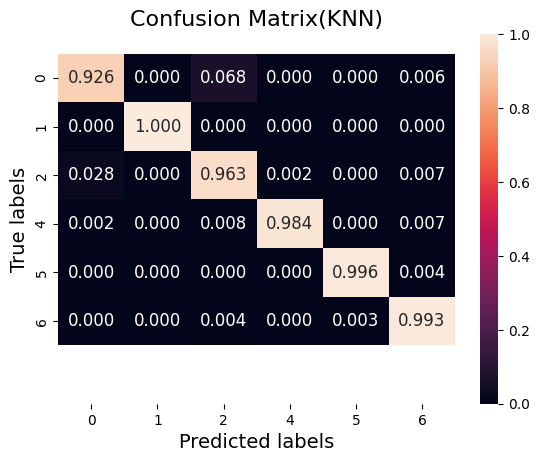

Accuracy: 0.9812911725955205
[[0.94496855 0.         0.05188679 0.         0.         0.00314465]
 [0.         1.         0.         0.         0.         0.        ]
 [0.03015075 0.         0.96482412 0.         0.         0.00502513]
 [0.00163132 0.         0.00489396 0.98858075 0.         0.00489396]
 [0.         0.         0.         0.         0.99573257 0.00426743]
 [0.         0.         0.0027972  0.         0.0041958  0.99300699]]
          0    1         2         4         5         6
0  0.944969  0.0  0.051887  0.000000  0.000000  0.003145
1  0.000000  1.0  0.000000  0.000000  0.000000  0.000000
2  0.030151  0.0  0.964824  0.000000  0.000000  0.005025
4  0.001631  0.0  0.004894  0.988581  0.000000  0.004894
5  0.000000  0.0  0.000000  0.000000  0.995733  0.004267
6  0.000000  0.0  0.002797  0.000000  0.004196  0.993007


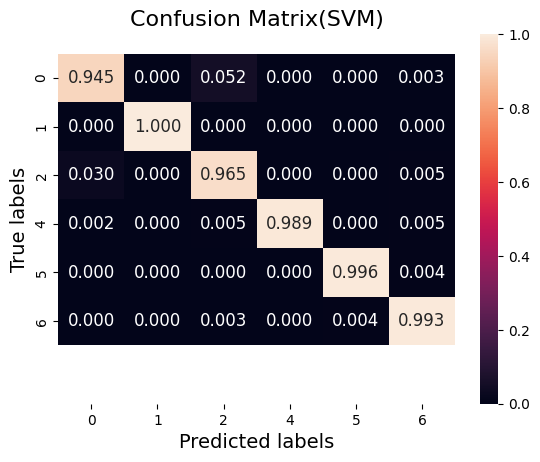

Accuracy: 0.9610013175230566
              precision    recall  f1-score   support

           0       0.94      0.91      0.93       636
           1       1.00      1.00      1.00       531
           2       0.90      0.92      0.91       597
           4       0.97      0.97      0.97       613
           5       0.99      0.99      0.99       703
           6       0.97      0.97      0.97       715

    accuracy                           0.96      3795
   macro avg       0.96      0.96      0.96      3795
weighted avg       0.96      0.96      0.96      3795



ValueError: Shape of passed values is (6, 6), indices imply (7, 7)

In [ ]:
# prompt: Give me code to knn svm and Decision Tree with confusion matrix on above excel file

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
Df2 = pd.read_excel('Ctgan_synthetics_2.xlsx')

# Separate features (X) and target variable (y)
X = Df2.drop('Class', axis=1)
y = Df2['Class']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Split the dataset into training and testing sets
for i in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)

# Step 5: Train the KNN Model
knn = KNeighborsClassifier(n_neighbors=5)  # You can change n_neighbors (k)
knn.fit(X_train, y_train)

# Step 6: Make Predictions and Evaluate the Model
y_pred = knn.predict(X_test)

# Step 7: Evaluate the Model's Performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
#print(cm)
cm=np.transpose( np.transpose(cm) / cm.astype(np.float64).sum(axis=1) )
print(cm)
# Get the unique class labels from y_test and y_pred
unique_labels = np.unique(np.concatenate((y_test, y_pred)))

# Create the DataFrame using the unique labels as index and columns
cm = pd.DataFrame(cm,
                     index = unique_labels.astype(str),  # Convert labels to strings
                     columns = unique_labels.astype(str)) # Convert labels to strings


print(cm)

ax=sns.heatmap(cm, annot=True, fmt="0.3f", annot_kws={"size": 12})
bottom, top = ax.get_ylim()
ax.set_ylim(bottom+1.2, top-0.4)
plt.xlabel("Predicted labels", fontsize=14)
plt.ylabel("True labels", fontsize=14)
plt.title("Confusion Matrix(KNN)", fontsize=16)
plt.show()
# Initialize and evaluate SVM
# Split the dataset into training and testing sets
for i in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)


#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

cm = confusion_matrix(y_test, y_pred)
#print(cm)
cm=np.transpose( np.transpose(cm) / cm.astype(np.float64).sum(axis=1) )
print(cm)
# Get the unique class labels from y_test and y_pred
unique_labels = np.unique(np.concatenate((y_test, y_pred)))

# Create the DataFrame using the unique labels as index and columns
cm = pd.DataFrame(cm,
                     index = unique_labels.astype(str),  # Convert labels to strings
                     columns = unique_labels.astype(str)) # Convert labels to strings

print(cm)

ax=sns.heatmap(cm, annot=True, fmt="0.3f", annot_kws={"size": 12})
bottom, top = ax.get_ylim()
ax.set_ylim(bottom+1.2, top-0.4)
plt.title("Confusion Matrix(SVM)", fontsize=16)
plt.xlabel("Predicted labels", fontsize=14)
plt.ylabel("True labels", fontsize=14)
plt.show()

# Initialize and evaluate Decision Tree
dt = DecisionTreeClassifier()
train_and_evaluate(dt, X_train, y_train, X_test, y_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the accuracy and classification report
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(report)


ax=sns.heatmap(cm, annot=True, fmt="0.3f", annot_kws={"size": 12})
bottom, top = ax.get_ylim()
ax.set_ylim(bottom+1.2, top-0.4)
plt.title("Confusion Matrix(DT)", fontsize=16)
plt.xlabel("Predicted labels", fontsize=14)
plt.ylabel("True labels", fontsize=14)
plt.show()


Accuracy: 0.98
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       415
           1       1.00      1.00      1.00       363
           2       0.93      0.97      0.95       416
           4       1.00      0.99      0.99       432
           5       0.99      1.00      1.00       448
           6       0.99      0.99      0.99       456

    accuracy                           0.98      2530
   macro avg       0.98      0.98      0.98      2530
weighted avg       0.98      0.98      0.98      2530



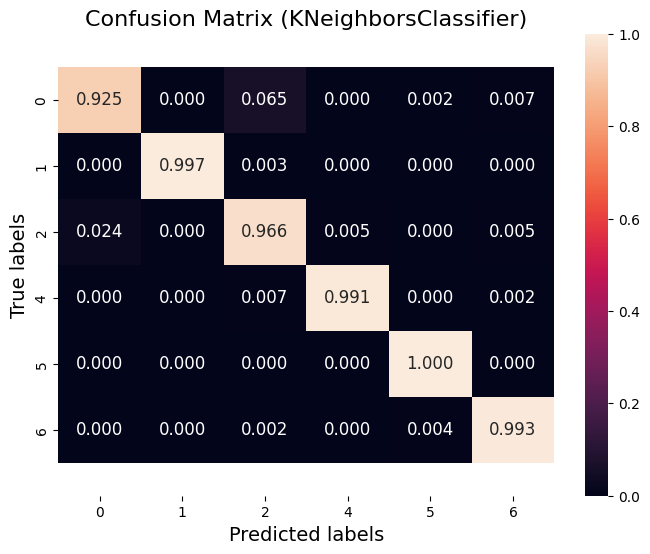

Accuracy: 0.98
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       415
           1       1.00      1.00      1.00       363
           2       0.94      0.95      0.95       416
           4       0.99      0.99      0.99       432
           5       0.99      1.00      1.00       448
           6       0.99      0.99      0.99       456

    accuracy                           0.98      2530
   macro avg       0.98      0.98      0.98      2530
weighted avg       0.98      0.98      0.98      2530



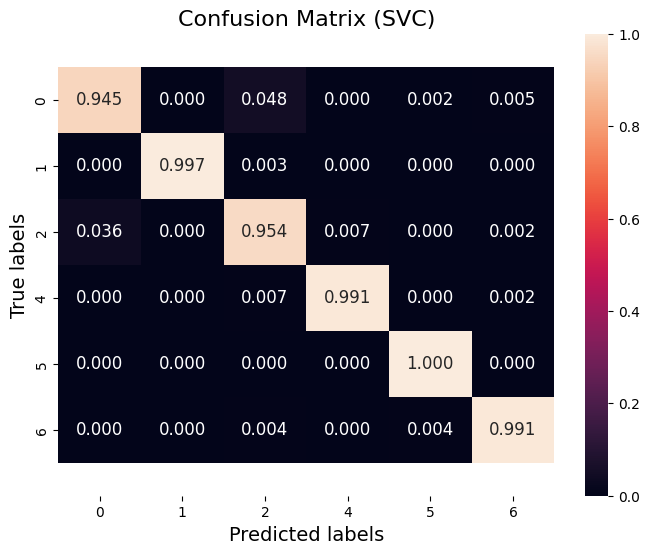

Accuracy: 0.96
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       415
           1       1.00      0.99      1.00       363
           2       0.90      0.92      0.91       416
           4       0.97      0.98      0.98       432
           5       0.98      1.00      0.99       448
           6       0.97      0.96      0.97       456

    accuracy                           0.96      2530
   macro avg       0.96      0.96      0.96      2530
weighted avg       0.96      0.96      0.96      2530



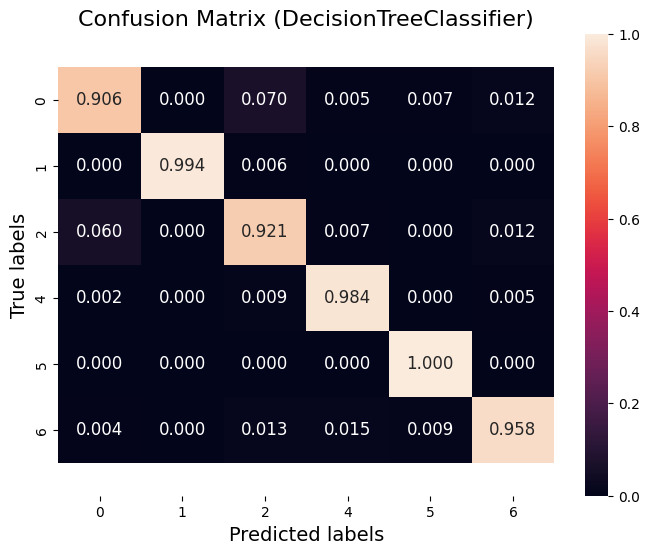

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
Df2 = pd.read_excel('Ctgan_synthetics_2.xlsx')

# Separate features (X) and target variable (y)
X = Df2.drop('Class', axis=1)
y = Df2['Class']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


def train_and_evaluate(model, X_train, y_train, X_test, y_test):
    """
    Trains and evaluates a given model, prints classification report and displays confusion matrix.

    Args:
        model: The machine learning model to be trained and evaluated.
        X_train: The training data features.
        y_train: The training data target variable.
        X_test: The testing data features.
        y_test: The testing data target variable.
    """
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Make predictions
    accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy
    report = classification_report(y_test, y_pred)  # Generate classification report
    cm = confusion_matrix(y_test, y_pred)  # Calculate confusion matrix

    # Get unique labels for the confusion matrix
    unique_labels = np.unique(np.concatenate((y_test, y_pred)))

    # Calculate normalized confusion matrix
    cm = np.transpose(np.transpose(cm) / cm.astype(np.float64).sum(axis=1))

    # Create a DataFrame for the confusion matrix using unique labels
    cm_df = pd.DataFrame(cm, index=unique_labels.astype(str), columns=unique_labels.astype(str))

    # Print accuracy and classification report
    print(f'Accuracy: {accuracy:.2f}')
    print('Classification Report:')
    print(report)

    # Display the confusion matrix using Seaborn
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_df, annot=True, fmt=".3f", annot_kws={"size": 12})
    bottom, top = plt.gca().get_ylim()  # Get current y-axis limits
    plt.gca().set_ylim(bottom + 0.5, top - 0.5)  # Adjust y-axis limits for better label visibility
    plt.xlabel("Predicted labels", fontsize=14)
    plt.ylabel("True labels", fontsize=14)
    plt.title(f"Confusion Matrix ({type(model).__name__})", fontsize=16)
    plt.show()


# Initialize and evaluate KNN
knn = KNeighborsClassifier(n_neighbors=5)
train_and_evaluate(knn, X_train, y_train, X_test, y_test)

# Initialize and evaluate SVM
clf = SVC(kernel='rbf')
train_and_evaluate(clf, X_train, y_train, X_test, y_test)

# Initialize and evaluate Decision Tree
dt = DecisionTreeClassifier()
train_and_evaluate(dt, X_train, y_train, X_test, y_test)

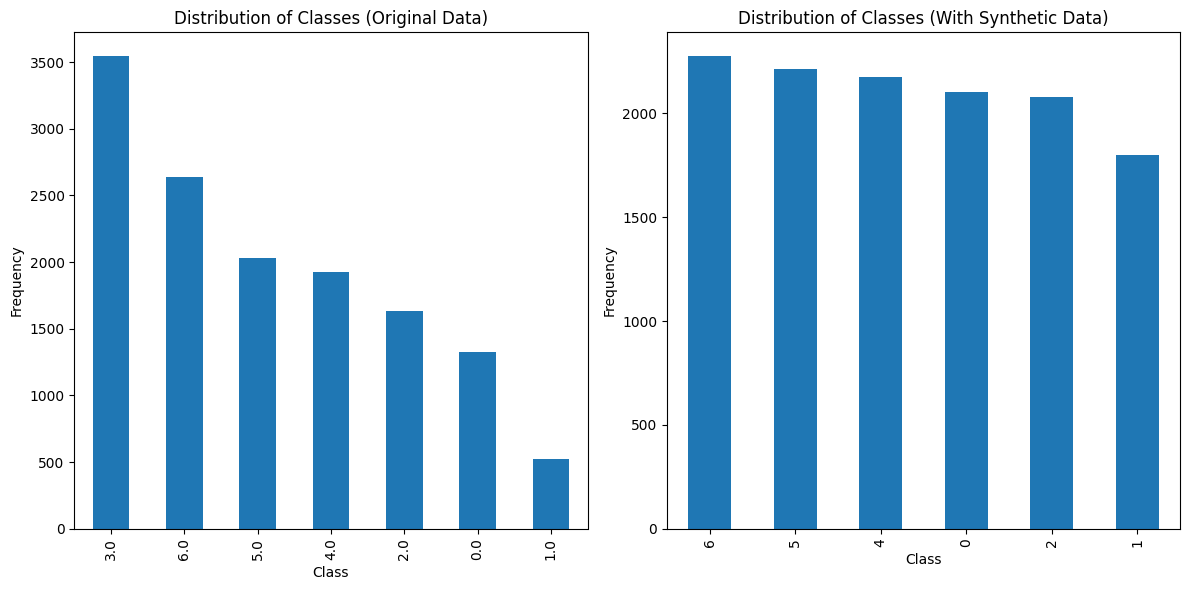

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'Df' is your original DataFrame and 'df' is the combined DataFrame with synthetic data

# Plot true values before and after synthetic data addition
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)  # Create a subplot for the original data
Df['Class'].value_counts().plot(kind='bar', title='Distribution of Classes (Original Data)')
plt.xlabel("Class")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)  # Create a subplot for the data with synthetic data
Df2['Class'].value_counts().plot(kind='bar', title='Distribution of Classes (With Synthetic Data)')
plt.xlabel("Class")
plt.ylabel("Frequency")

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()  # Display the plot

Accuracy Comparison:
KNN:
  Original Data: 0.9232
  With Synthetic Data: 0.9791
  Difference: 0.0558
--------------------
SVM:
  Original Data: 0.9339
  With Synthetic Data: 0.9798
  Difference: 0.0459
--------------------
Decision Tree:
  Original Data: 0.8935
  With Synthetic Data: 0.9625
  Difference: 0.0690
--------------------


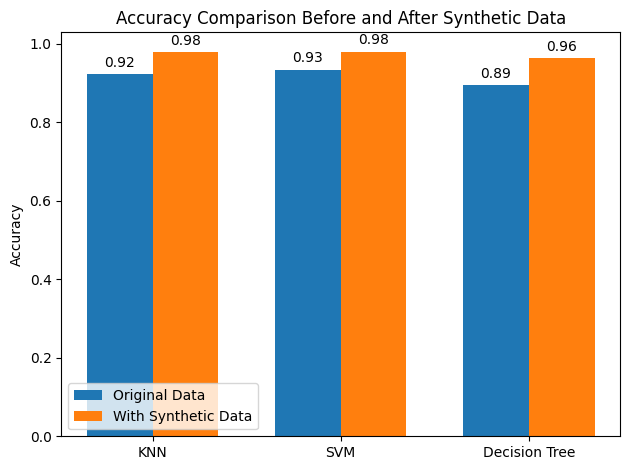

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np


# Load the original and synthetic datasets
Df = Df  # Replace 'original_data.xlsx' with your original data file
Df2 = pd.read_excel('Ctgan_synthetics_2.xlsx') # Assuming this is your synthetic data

# Function to train and evaluate a model
def train_and_evaluate(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# Prepare data for original dataset
X_original = Df.drop('Class', axis=1)  # Assuming 'Class' is your target column
y_original = Df['Class']
X_train_original, X_test_original, y_train_original, y_test_original = train_test_split(
    X_original, y_original, test_size=0.2, random_state=42
)

# Prepare data for dataset with synthetic data
X_synthetic = Df2.drop('Class', axis=1)
y_synthetic = Df2['Class']
X_train_synthetic, X_test_synthetic, y_train_synthetic, y_test_synthetic = train_test_split(
    X_synthetic, y_synthetic, test_size=0.2, random_state=42
)

# Scale the features
scaler = StandardScaler()
X_train_original = scaler.fit_transform(X_train_original)
X_test_original = scaler.transform(X_test_original)
X_train_synthetic = scaler.fit_transform(X_train_synthetic)
X_test_synthetic = scaler.transform(X_test_synthetic)

# Initialize models
knn = KNeighborsClassifier(n_neighbors=5)
svm = SVC(kernel='rbf')
dt = DecisionTreeClassifier()

# Evaluate models on original data
original_accuracy = {
    "KNN": train_and_evaluate(knn, X_train_original, y_train_original, X_test_original, y_test_original),
    "SVM": train_and_evaluate(svm, X_train_original, y_train_original, X_test_original, y_test_original),
    "Decision Tree": train_and_evaluate(dt, X_train_original, y_train_original, X_test_original, y_test_original)
}

# Evaluate models on data with synthetic data
synthetic_accuracy = {
    "KNN": train_and_evaluate(knn, X_train_synthetic, y_train_synthetic, X_test_synthetic, y_test_synthetic),
    "SVM": train_and_evaluate(svm, X_train_synthetic, y_train_synthetic, X_test_synthetic, y_test_synthetic),
    "Decision Tree": train_and_evaluate(dt, X_train_synthetic, y_train_synthetic, X_test_synthetic, y_test_synthetic)
}

# Compare accuracies
print("Accuracy Comparison:")
for model_name in original_accuracy:
    print(f"{model_name}:")
    print(f"  Original Data: {original_accuracy[model_name]:.4f}")
    print(f"  With Synthetic Data: {synthetic_accuracy[model_name]:.4f}")
    print(f"  Difference: {synthetic_accuracy[model_name] - original_accuracy[model_name]:.4f}")
    print("-" * 20)


# Create a DataFrame for plotting
accuracy_df = pd.DataFrame({
    "Model": list(original_accuracy.keys()),
    "Original Accuracy": list(original_accuracy.values()),
    "Synthetic Accuracy": list(synthetic_accuracy.values())
})

# Plotting
X = np.arange(len(accuracy_df))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(X - width/2, accuracy_df["Original Accuracy"], width, label="Original Data")
rects2 = ax.bar(X + width/2, accuracy_df["Synthetic Accuracy"], width, label="With Synthetic Data")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel("Accuracy")
ax.set_title("Accuracy Comparison Before and After Synthetic Data")
ax.set_xticks(X)
ax.set_xticklabels(accuracy_df["Model"])
ax.legend()

# Add value labels on top of bars
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()